In [7]:
import warnings
warnings.filterwarnings('ignore')

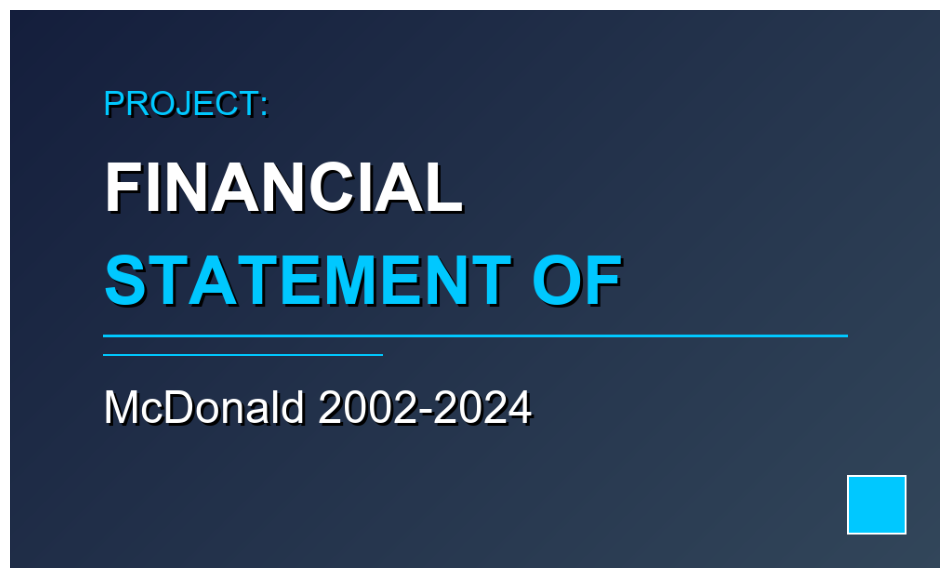

In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np

width, height = 1000, 600
bg_color = (20, 30, 60)  
text_color = (255, 255, 255) 
accent_color = (0, 200, 255)  

def create_gradient(width, height, start_color, end_color):
    base = Image.new('RGB', (width, height), start_color)
    top = Image.new('RGB', (width, height), end_color)
    mask = Image.new('L', (width, height))
    mask_data = np.array([[(x + y) / (width + height) * 255 
                         for x in range(width)] for y in range(height)])
    mask = Image.fromarray(mask_data.astype('uint8'))
    base.paste(top, (0, 0), mask)
    return base

image = create_gradient(width, height, bg_color, (50, 70, 90))
draw = ImageDraw.Draw(image)

try:
    font_title = ImageFont.truetype("arialbd.ttf", 72)
    font_subtitle = ImageFont.truetype("arial.ttf", 48)
    font_details = ImageFont.truetype("arial.ttf", 36)
except:
    font_title = ImageFont.load_default()
    font_subtitle = ImageFont.load_default()
    font_details = ImageFont.load_default()

def draw_shadowed_text(draw, text, position, font, fill, shadowcolor=(0,0,0,100)):
    x, y = position
    shadow_position = (x+3, y+3)
    draw.text(shadow_position, text, font=font, fill=shadowcolor)
    draw.text(position, text, font=font, fill=fill)

draw_shadowed_text(draw, "PROJECT:", (100, 80), font_details, accent_color)
draw_shadowed_text(draw, "FINANCIAL", (100, 150), font_title, text_color)
draw_shadowed_text(draw, "STATEMENT OF ", (100, 250), font_title, accent_color)
draw_shadowed_text(draw, "McDonald 2002-2024", (100, 400), font_subtitle, text_color)

draw.line([(100, 350), (900, 350)], fill=accent_color, width=3)
draw.line([(100, 370), (400, 370)], fill=accent_color, width=2)

try:
    from PIL import ImageOps
    icon = Image.new('RGB', (60, 60), accent_color)
    icon = ImageOps.expand(icon, border=2, fill=text_color)
    image.paste(icon, (width-100, height-100))
except:
    pass

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!pip install torch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('McDonalds_Financial_Statements.csv')
df

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2024,218.22,25.92,8.90,24.0,8.20,-47.00,46.00,11.39,0.71,4.70,2.20,6.00,-5.00,57.00,53.41,61.00
1,2023,191.99,25.49,8.47,25.4,8.44,-45.69,45.55,11.56,0.72,4.58,2.16,5.80,-5.50,56.15,49.75,60.85
2,2022,193.01,23.18,7.82,31.3,8.33,-32.20,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
3,2021,200.31,23.22,9.12,26.5,8.63,-43.50,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
4,2020,159.88,19.20,6.14,33.8,8.32,-20.40,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
5,2019,147.47,21.28,8.01,24.8,6.93,-18.00,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
6,2018,136.21,21.02,7.81,23.2,6.48,-21.80,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06
7,2017,137.21,22.82,8.57,26.7,6.01,-42.00,37.57,6.46,0.79,2.46,2.23,3.83,-3.27,33.80,29.53,37.07
8,2016,101.08,24.62,6.86,22.0,4.11,-45.90,27.89,5.53,0.81,1.22,2.97,3.61,-2.21,31.02,25.95,33.22
9,2015,107.12,25.41,6.55,24.2,4.22,15.10,25.80,4.88,0.90,7.68,2.91,3.44,7.08,37.93,24.12,30.85


In [13]:
df.shape

(23, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 23 non-null     int64  
 1   Market cap ($B)                      23 non-null     float64
 2   Revenue ($B)                         23 non-null     float64
 3   Earnings ($B)                        23 non-null     float64
 4   P/E ratio                            23 non-null     float64
 5   P/S ratio                            23 non-null     float64
 6   P/B ratio                            23 non-null     float64
 7   Operating Margin (%)                 23 non-null     float64
 8   EPS ($)                              23 non-null     float64
 9   Shares Outstanding ($B)              23 non-null     float64
 10  Cash on Hand ($B)                    23 non-null     float64
 11  Dividend Yield (%)                

In [17]:
df.describe()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2013.00000,106.240000,22.966957,6.429565,21.926087,4.590000,-10.512609,28.531304,5.428696,0.970435,2.583478,2.460435,3.027826,6.133043,36.890870,23.920435,30.674783
std,6.78233,57.425915,3.354002,2.239640,5.360225,2.461347,21.644293,9.647757,3.058852,0.207660,1.693033,0.555857,1.840573,9.735311,10.375454,16.700528,18.647250
min,2002.00000,20.390000,15.400000,1.660000,15.000000,1.320000,-47.000000,10.790000,0.700000,0.710000,0.330000,1.460000,0.240000,-8.220000,23.970000,8.430000,13.540000
25%,2007.50000,67.530000,20.915000,5.010000,16.900000,2.955000,-27.000000,22.550000,3.360000,0.750000,1.580000,2.155000,1.560000,-4.805000,29.685000,10.175000,14.955000
50%,2013.00000,96.090000,23.180000,7.000000,22.000000,3.420000,2.810000,29.080000,5.340000,0.990000,2.330000,2.360000,3.120000,11.980000,32.980000,14.120000,20.610000
75%,2018.50000,142.340000,25.450000,8.040000,25.100000,6.705000,5.355000,35.465000,7.055000,1.145000,3.115000,2.925000,4.460000,14.510000,42.720000,38.970000,47.390000
max,2024.00000,218.220000,28.100000,9.120000,33.800000,8.630000,15.100000,46.000000,11.560000,1.270000,7.680000,3.500000,6.000000,16.000000,57.000000,53.410000,61.000000


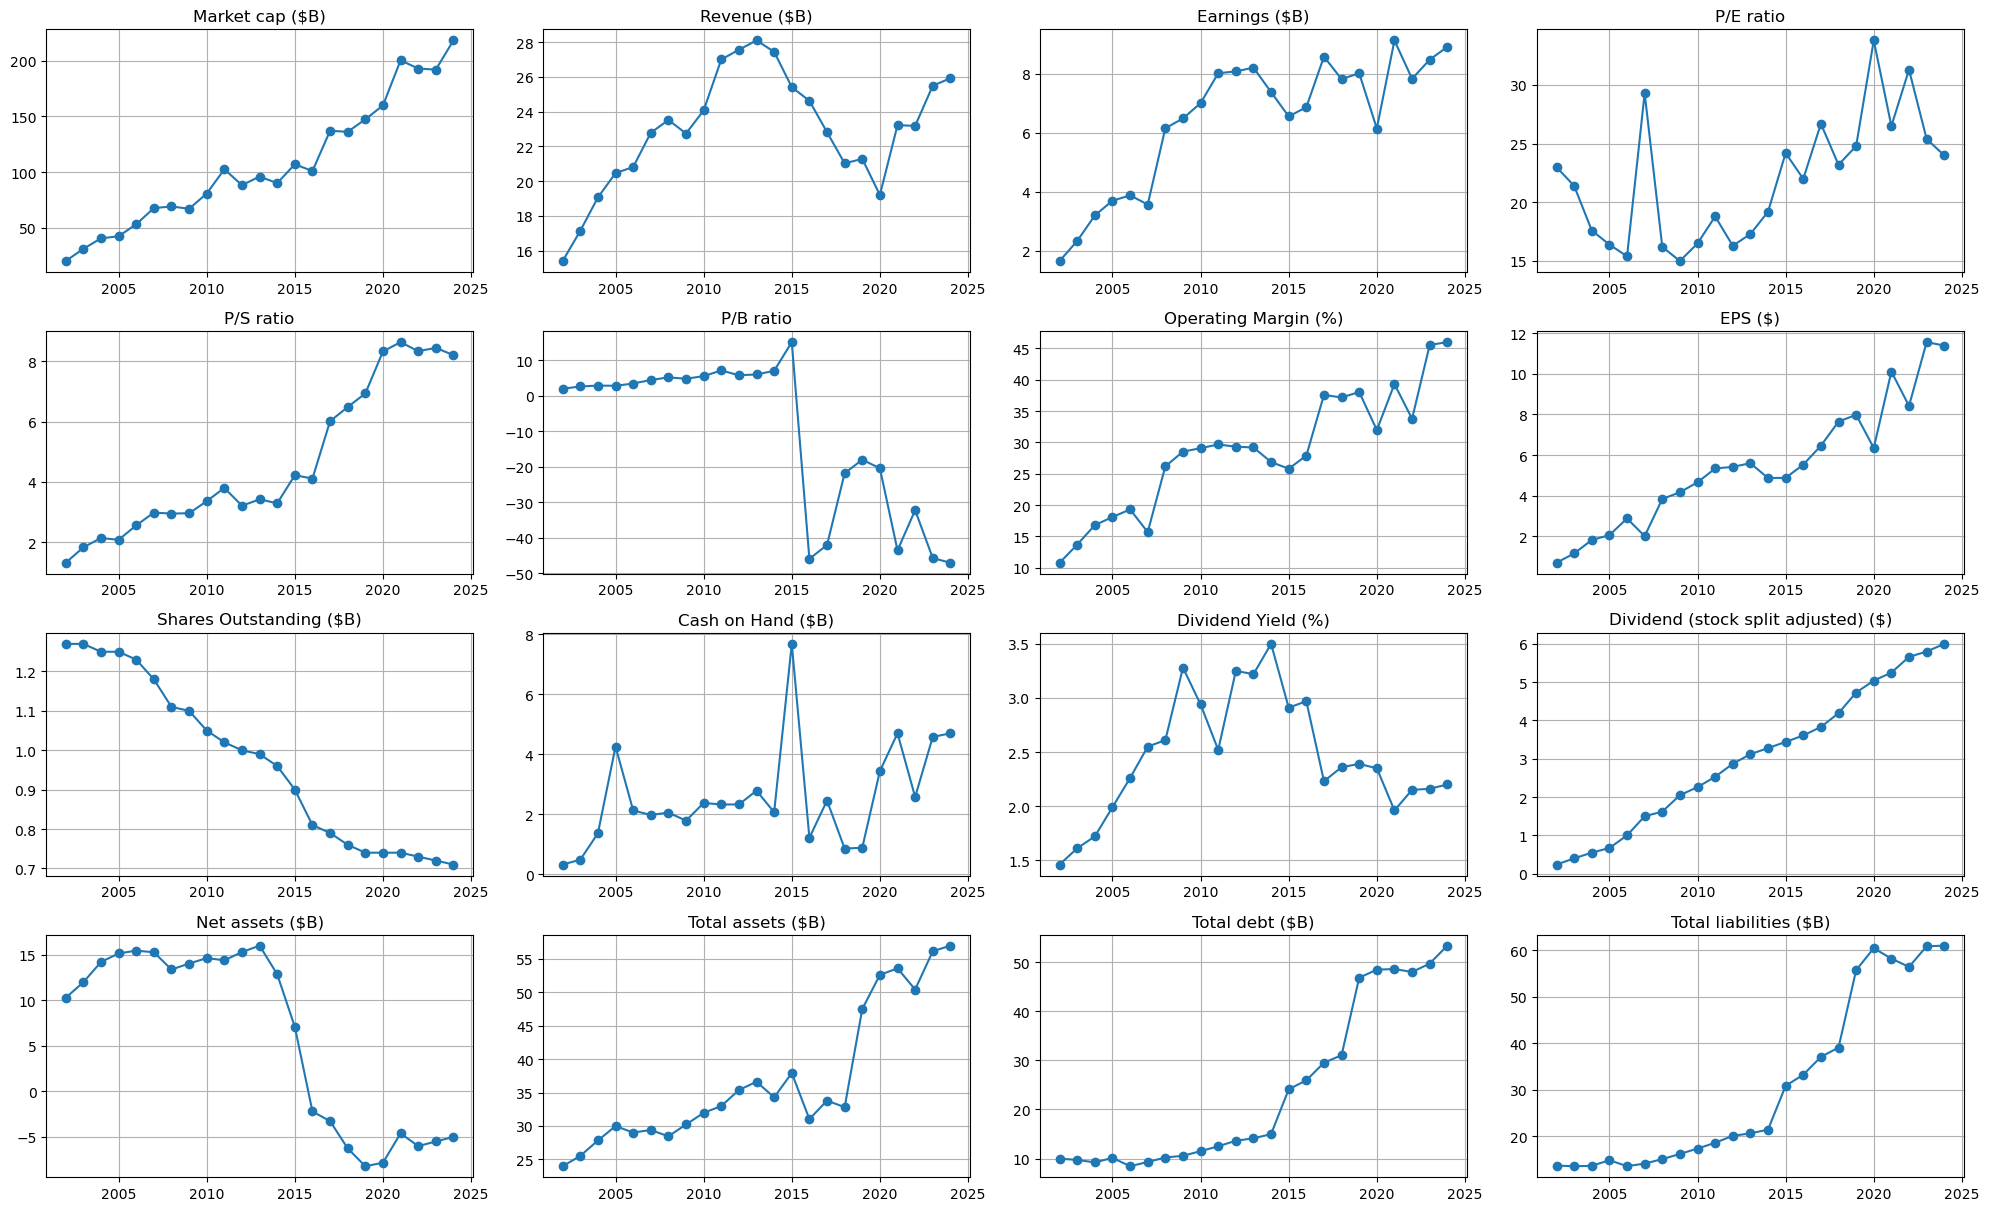

In [31]:
r = 5
c = 4
it = 1

plt.figure(figsize=(20, 15))  # tăng kích thước cho dễ nhìn

for i in df.columns:
    if i != "Year":  # bỏ qua cột Year vì dùng làm trục x
        plt.subplot(r, c, it)
        plt.plot(df["Year"], df[i], marker='o')
        plt.title(i)
        plt.grid(True)
        it += 1

plt.tight_layout()
plt.show()

In [35]:
indicators = ['Revenue ($B)', 
              'Earnings ($B)', 
              'P/E ratio',
              'P/S ratio', 
              'P/B ratio', 
              'Operating Margin (%)', 
              'EPS ($)',
              'Total debt ($B)', 
              'Total liabilities ($B)']

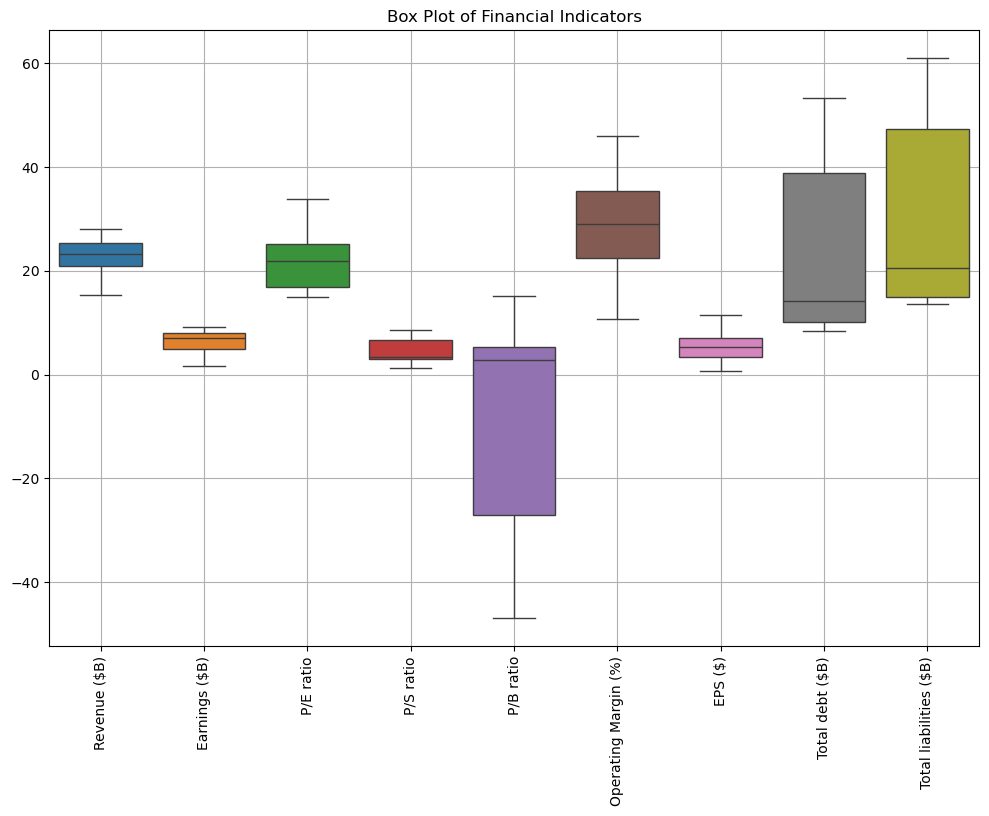

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[indicators])
plt.title('Box Plot of Financial Indicators')
plt.xticks(rotation=90)
plt.grid(True)

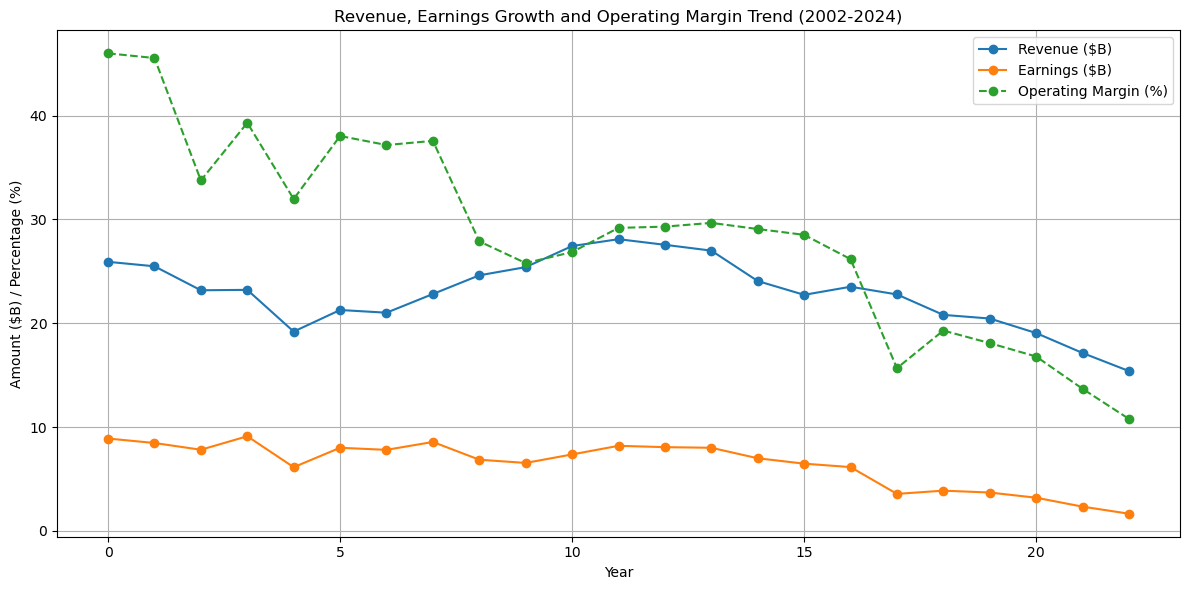

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue ($B)'], marker='o', label='Revenue ($B)')
plt.plot(df.index, df['Earnings ($B)'], marker='o', label='Earnings ($B)')
plt.plot(df.index, df['Operating Margin (%)'], marker='o', label='Operating Margin (%)', linestyle='--')

plt.title('Revenue, Earnings Growth and Operating Margin Trend (2002-2024)')
plt.xlabel('Year')
plt.ylabel('Amount ($B) / Percentage (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

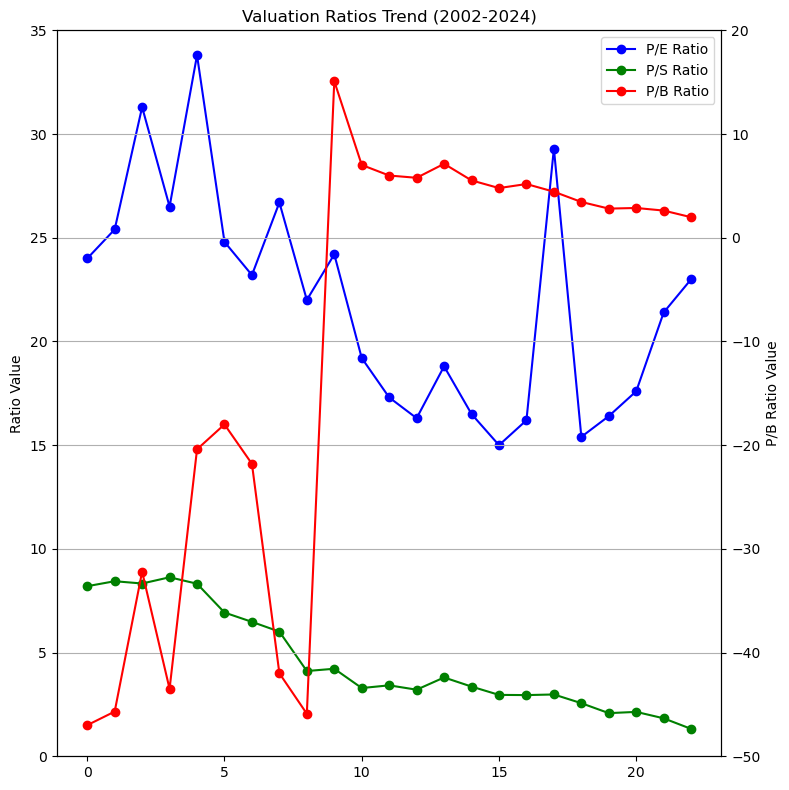

In [105]:
plt.figure(figsize=(8, 8))

# Vẽ P/E và P/S trên trục chính
ax1 = plt.gca()
ax1.plot(df.index, df['P/E ratio'], marker='o', color='blue', label='P/E Ratio')
ax1.plot(df.index, df['P/S ratio'], marker='o', color='green', label='P/S Ratio')
ax1.set_ylabel('Ratio Value')
ax1.set_ylim(0, 35)

# Vẽ P/B trên trục phụ (vì giá trị âm và khoảng cách lớn)
ax2 = ax1.twinx()
ax2.plot(df.index, df['P/B ratio'], marker='o', color='red', label='P/B Ratio')
ax2.set_ylabel('P/B Ratio Value')
ax2.set_ylim(-50, 20)

plt.title('Valuation Ratios Trend (2002-2024)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

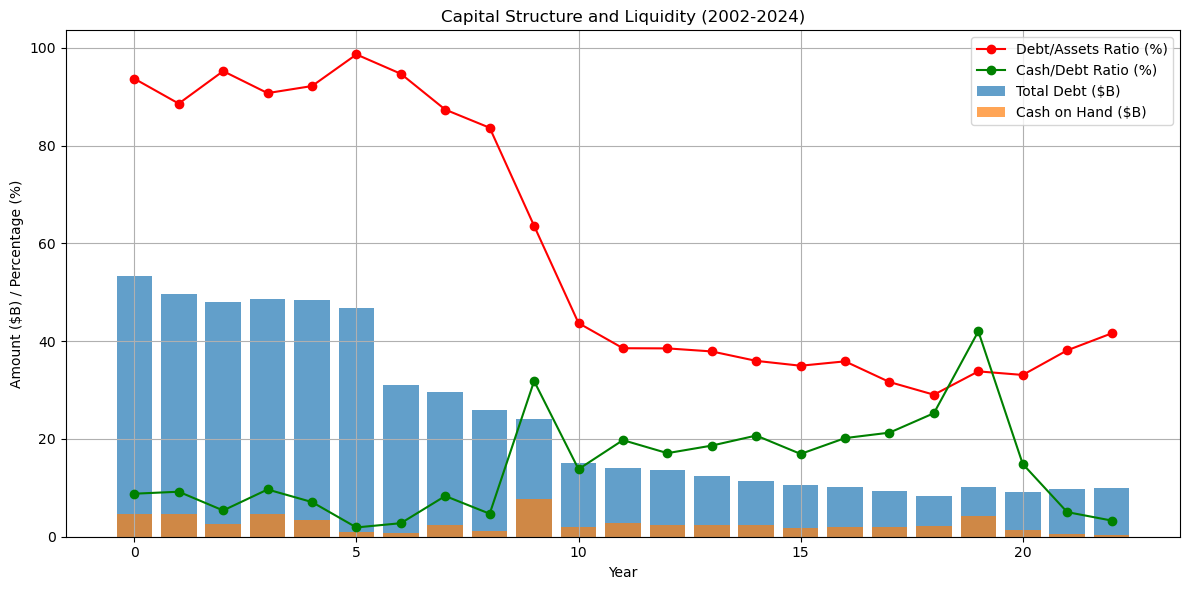

In [109]:
plt.figure(figsize=(12, 6))

# Tính toán các chỉ số
df['Debt/Assets'] = df['Total debt ($B)'] / df['Total assets ($B)']
df['Cash/Debt'] = df['Cash on Hand ($B)'] / df['Total debt ($B)']

# Vẽ biểu đồ
plt.bar(df.index, df['Total debt ($B)'], label='Total Debt ($B)', alpha=0.7)
plt.bar(df.index, df['Cash on Hand ($B)'], label='Cash on Hand ($B)', alpha=0.7)
plt.plot(df.index, df['Debt/Assets']*100, marker='o', color='red', label='Debt/Assets Ratio (%)')
plt.plot(df.index, df['Cash/Debt']*100, marker='o', color='green', label='Cash/Debt Ratio (%)')

plt.title('Capital Structure and Liquidity (2002-2024)')
plt.xlabel('Year')
plt.ylabel('Amount ($B) / Percentage (%)')
plt.legend(loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

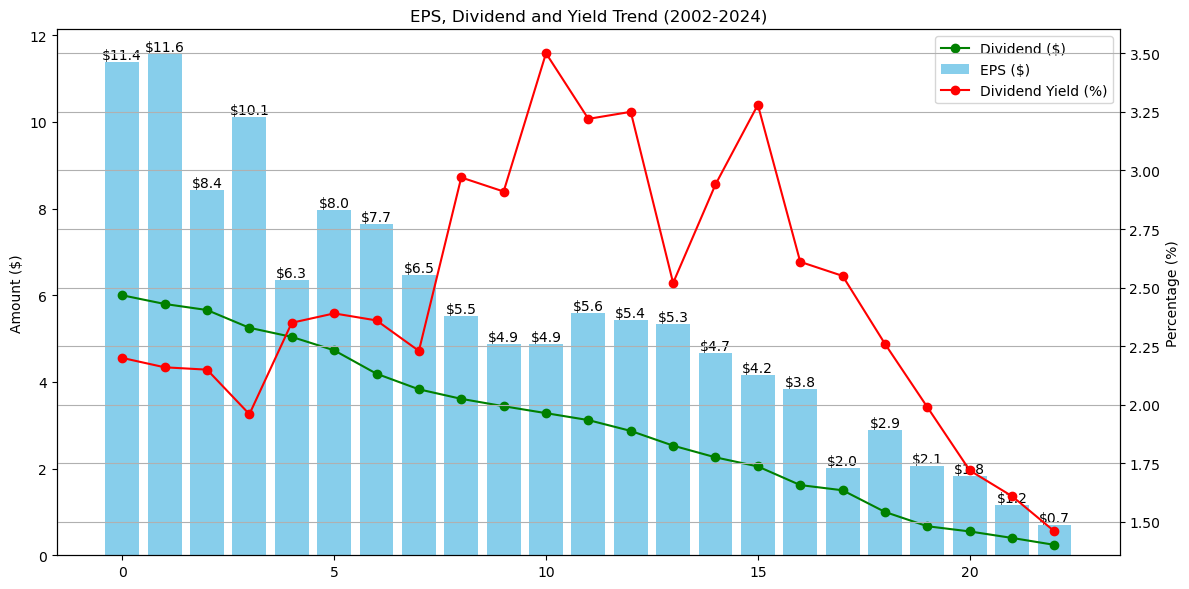

In [113]:
plt.figure(figsize=(12, 6))

# Vẽ EPS và cổ tức trên trục chính
ax1 = plt.gca()
ax1.bar(df.index, df['EPS ($)'], color='skyblue', label='EPS ($)')
ax1.plot(df.index, df['Dividend (stock split adjusted) ($)'], marker='o', color='green', label='Dividend ($)')
ax1.set_ylabel('Amount ($)')

# Vẽ tỷ suất cổ tức trên trục phụ
ax2 = ax1.twinx()
ax2.plot(df.index, df['Dividend Yield (%)'], marker='o', color='red', label='Dividend Yield (%)')
ax2.set_ylabel('Percentage (%)')

plt.title('EPS, Dividend and Yield Trend (2002-2024)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Thêm chú thích giá trị
for year in df.index:
    ax1.text(year, df.loc[year, 'EPS ($)'], f"${df.loc[year, 'EPS ($)']:.1f}", ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

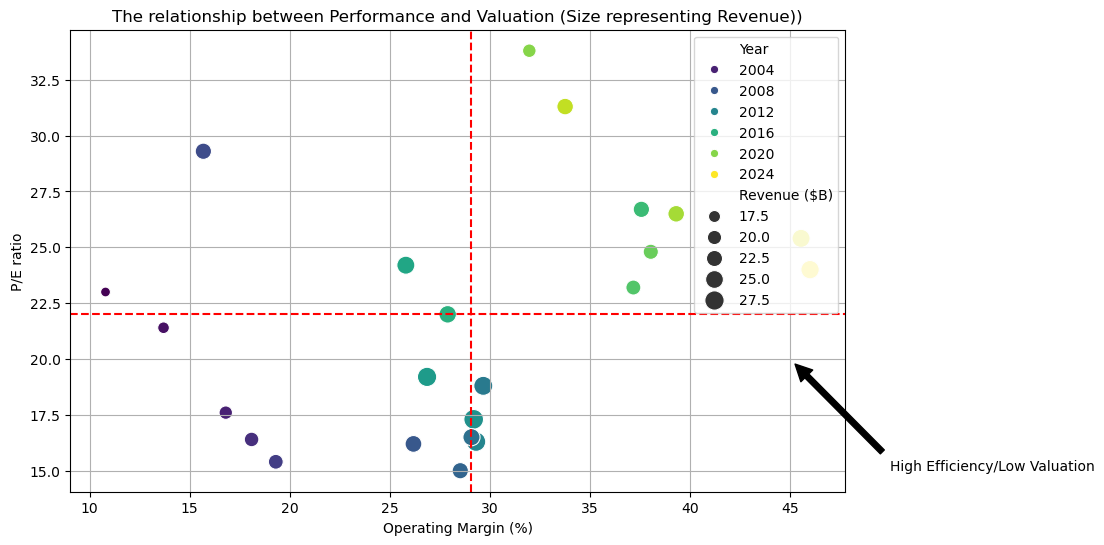

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Operating Margin (%)', y='P/E ratio', 
               hue='Year', palette='viridis', size='Revenue ($B)', sizes=(50, 200))
plt.title('The relationship between Performance and Valuation (Size representing Revenue))')
plt.axvline(x=df['Operating Margin (%)'].median(), color='r', linestyle='--')
plt.axhline(y=df['P/E ratio'].median(), color='r', linestyle='--')
plt.annotate('High Efficiency/Low Valuation', 
             xy=(45, 20), xytext=(50, 15),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()

In [79]:
def assign_period(year):
    if 2002 <= year <= 2009:
        return '2002-2009'
    elif 2010 <= year <= 2014:
        return '2010-2014'
    elif 2015 <= year <= 2019:
        return '2015-2019'
    elif 2020 <= year <= 2024:
        return '2020-2024'
    else:
        return 'Other'

df['Period'] = df['Year'].apply(assign_period)

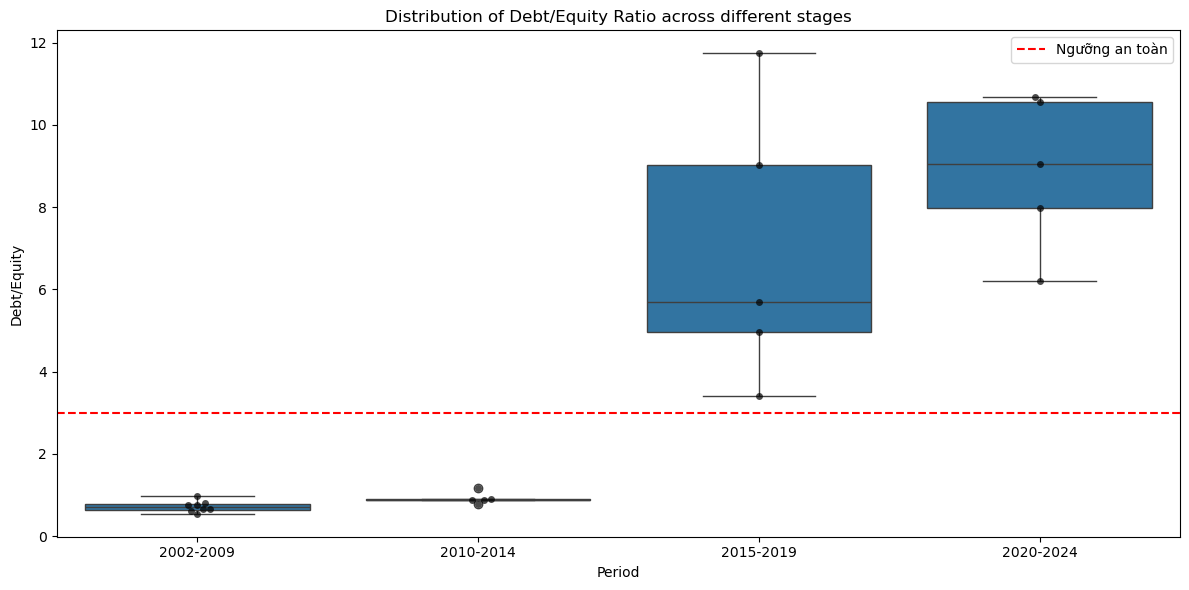

In [123]:
df['Debt/Equity'] = df['Total debt ($B)'] / abs(df['Net assets ($B)'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
order = ['2002-2009', '2010-2014', '2015-2019', '2020-2024']

sns.boxplot(data=df, x='Period', y='Debt/Equity', order=order)
sns.swarmplot(data=df, x='Period', y='Debt/Equity', 
              color='black', alpha=0.7, order=order)

plt.title('Distribution of Debt/Equity Ratio across different stages')
plt.axhline(y=3, color='r', linestyle='--', label='Ngưỡng an toàn')
plt.legend()
plt.tight_layout()
plt.show()

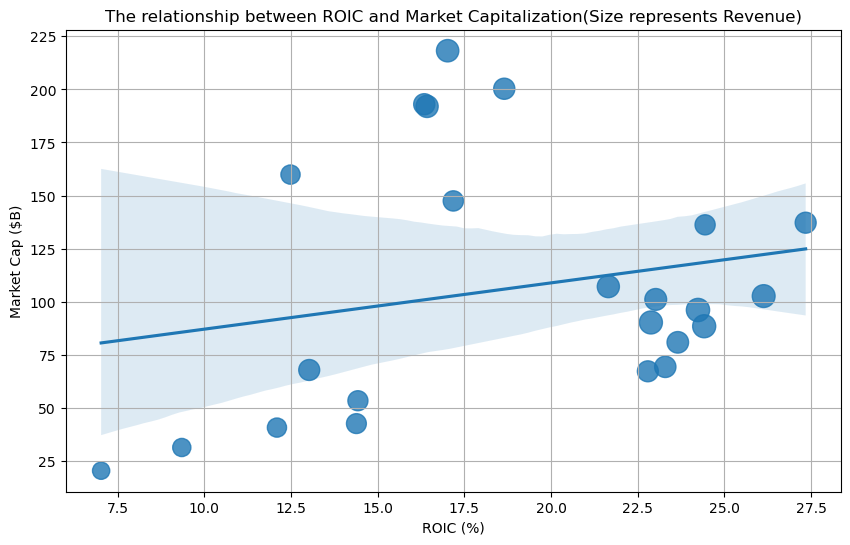

In [119]:
df['ROIC'] = df['Earnings ($B)'] / (df['Total assets ($B)'] - df['Cash on Hand ($B)']) * 100

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='ROIC', y='Market cap ($B)', 
           scatter_kws={'s': df['Revenue ($B)']*10})
plt.title('The relationship between ROIC and Market Capitalization(Size represents Revenue)')
plt.xlabel('ROIC (%)')
plt.ylabel('Market Cap ($B)')
plt.grid(True)
plt.show()

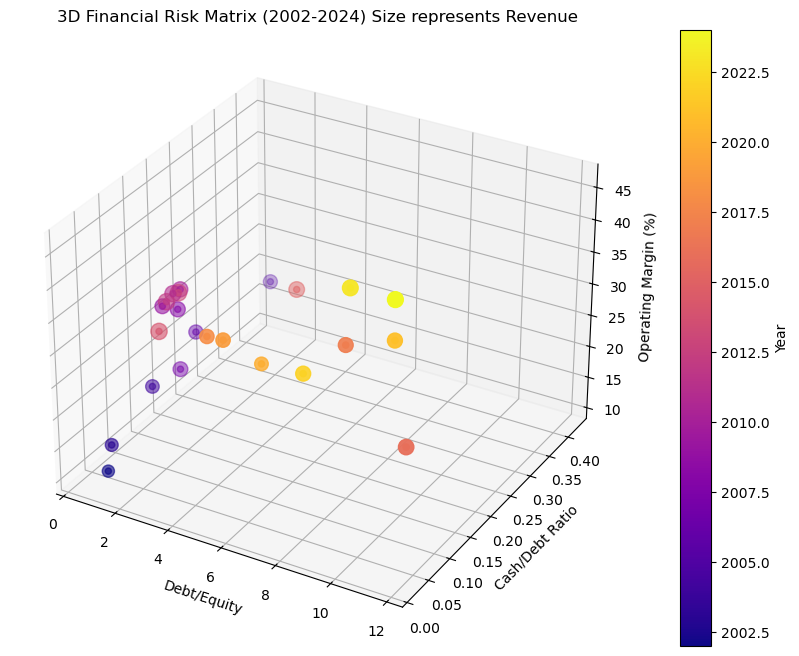

In [121]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Debt/Equity']
ys = df['Cash on Hand ($B)']/df['Total debt ($B)']
zs = df['Operating Margin (%)']
ax.scatter(xs, ys, zs, c=df['Year'], cmap='plasma', s=df['Revenue ($B)']*5)

ax.set_xlabel('Debt/Equity')
ax.set_ylabel('Cash/Debt Ratio')
ax.set_zlabel('Operating Margin (%)')
plt.title('3D Financial Risk Matrix (2002-2024) Size represents Revenue')
plt.colorbar(ax.scatter(xs, ys, zs, c=df['Year'], cmap='plasma'), label='Year')
plt.show()

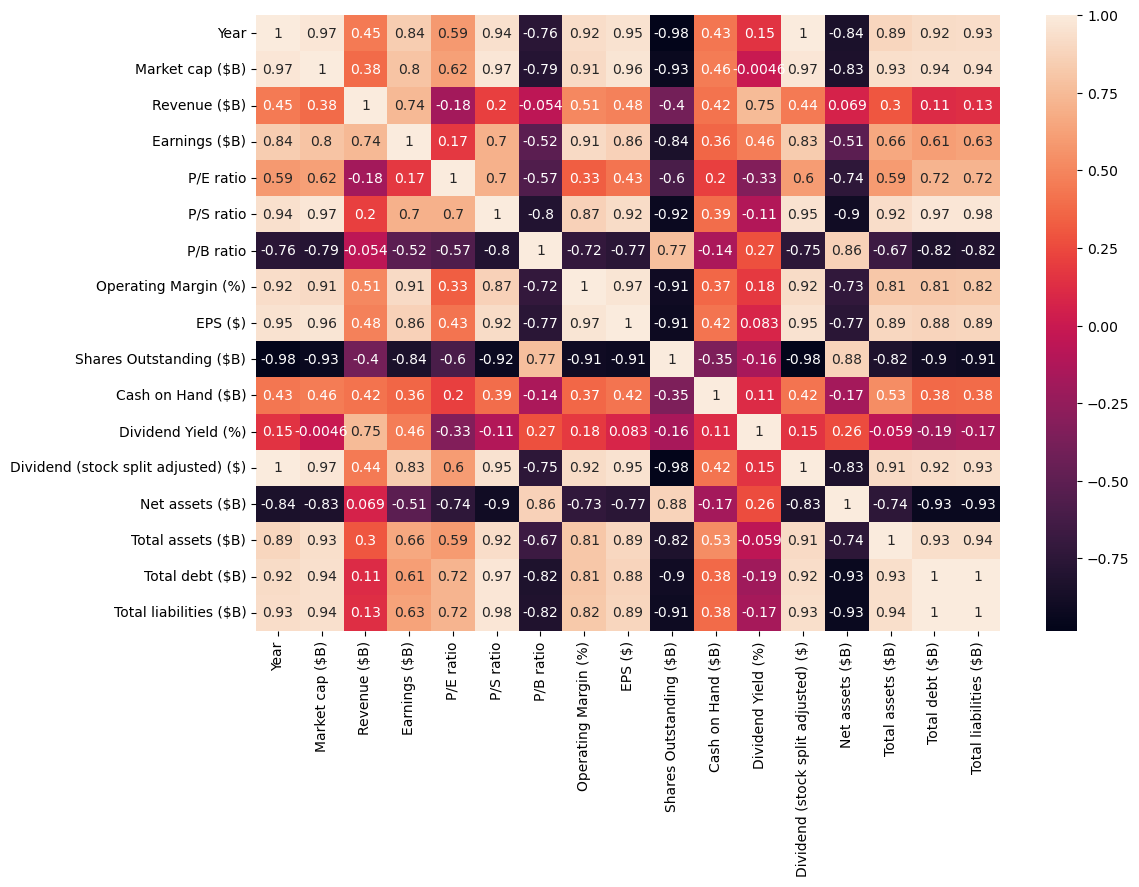

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

                             OLS Regression Results                             
Dep. Variable:     Operating Margin (%)   R-squared:                       0.968
Model:                              OLS   Adj. R-squared:                  0.950
Method:                   Least Squares   F-statistic:                     53.46
Date:                  Tue, 03 Jun 2025   Prob (F-statistic):           3.54e-09
Time:                          21:26:18   Log-Likelihood:                -44.566
No. Observations:                    23   AIC:                             107.1
Df Residuals:                        14   BIC:                             117.4
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

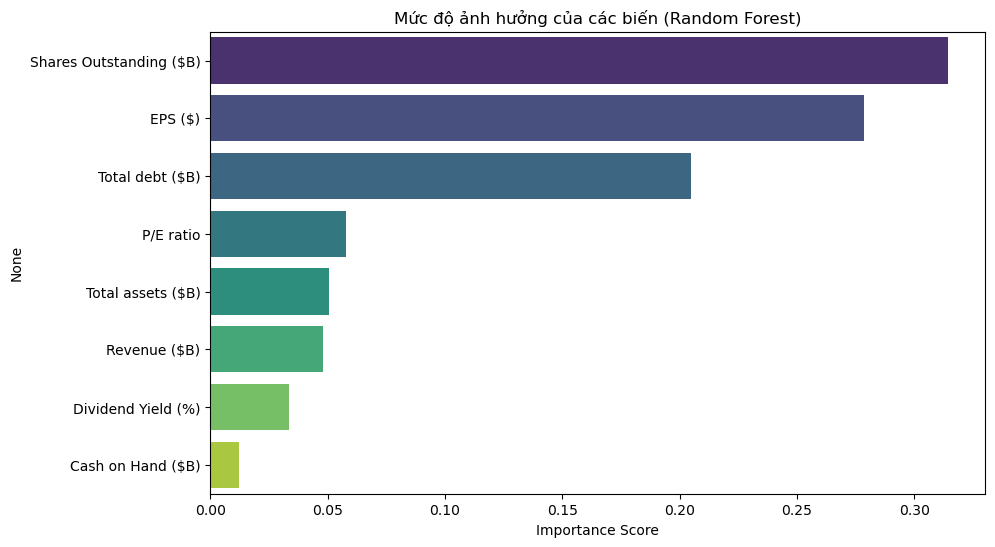


Kiểm tra đa cộng tuyến (VIF > 5 là đáng lo ngại):
                   Feature         VIF
0             Revenue ($B)  428.609425
6        Total assets ($B)  271.784491
1          Total debt ($B)  157.093221
7                  EPS ($)  121.736645
5       Dividend Yield (%)   85.129300
4  Shares Outstanding ($B)   73.631580
3                P/E ratio   72.071257
2        Cash on Hand ($B)    6.625797


In [155]:
features = ['Revenue ($B)', 'Total debt ($B)', 'Cash on Hand ($B)', 
           'P/E ratio', 'Shares Outstanding ($B)', 'Dividend Yield (%)',
           'Total assets ($B)', 'EPS ($)']
X = df[features]
y = df['Operating Margin (%)']


# 2. Hồi quy tuyến tính (OLS)
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

# 3. Phân tích Feature Importance bằng Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Visualize feature importance
plt.figure(figsize=(10,6))
importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=importance, y=importance.index, palette='viridis')
plt.title('Mức độ ảnh hưởng của các biến (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

# 4. Kiểm tra đa cộng tuyến
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nKiểm tra đa cộng tuyến (VIF > 5 là đáng lo ngại):")
print(vif_data.sort_values('VIF', ascending=False))

# Building Model

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

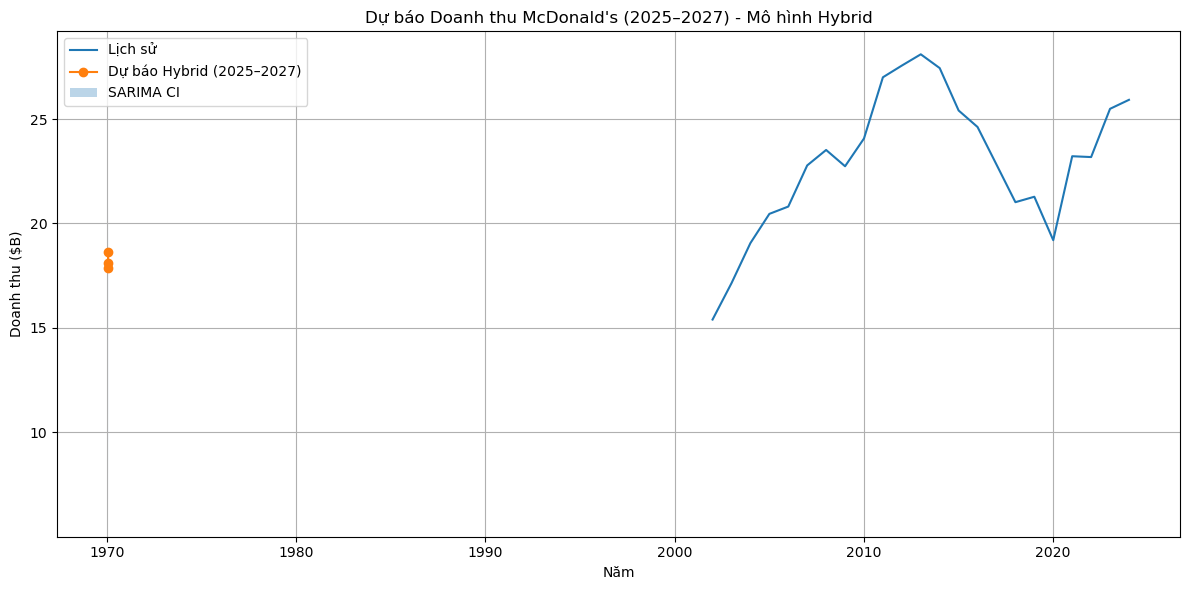

Dự báo doanh thu năm 2025: 18.63 tỷ USD
Dự báo doanh thu năm 2026: 18.11 tỷ USD
Dự báo doanh thu năm 2027: 17.88 tỷ USD


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# -------------------------
# 1. CHUẨN BỊ DỮ LIỆU
# -------------------------
# Giả sử bạn có cột 'Year' và đã set index là datetime hoặc số năm
df = df.copy()
df.index = pd.to_datetime(df['Year'], format='%Y')  # đảm bảo dùng datetime index

# -------------------------
# 2. TRAIN SARIMA
# -------------------------
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)
sarima_model = SARIMAX(df['Revenue ($B)'], 
                       order=order, 
                       seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# DỰ BÁO SARIMA ĐẾN 2027
future_steps = 3  # 2025, 2026, 2027
forecast_sarima = sarima_result.get_forecast(steps=future_steps)
sarima_pred = forecast_sarima.predicted_mean
sarima_ci = forecast_sarima.conf_int()

# -------------------------
# 3. DỰ BÁO VỚI RANDOM FOREST
# -------------------------
# Huấn luyện với toàn bộ dữ liệu hiện có
features = ['Operating Margin (%)', 'Total debt ($B)', 'EPS ($)', 'P/E ratio']
X = df[features]
y = df['Revenue ($B)']

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X, y)

# Dự báo dữ liệu tài chính cho 2025–2027 bằng Linear Regression
from sklearn.linear_model import LinearRegression

future_years = [2025, 2026, 2027]
future_inputs = {}

for feature in features:
    reg = LinearRegression()
    reg.fit(df[['Year']], df[feature])
    future_inputs[feature] = reg.predict(np.array(future_years).reshape(-1, 1))

future_X = pd.DataFrame(future_inputs, index=pd.to_datetime([f"{y}-01-01" for y in future_years]))

# Dự báo với Random Forest
rf_pred = rf_model.predict(future_X)

# -------------------------
# 4. TỔNG HỢP HYBRID DỰ BÁO
# -------------------------
# Trọng số kết hợp SARIMA và RF
hybrid_pred = sarima_pred * 0.6 + rf_pred * 0.4

# -------------------------
# 5. BIỂU ĐỒ DỰ BÁO 2025–2027
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Revenue ($B)'], label='Lịch sử')
plt.plot(sarima_pred.index, hybrid_pred, label='Dự báo Hybrid (2025–2027)', marker='o')

# Vùng tin cậy SARIMA
plt.fill_between(sarima_pred.index, 
                 sarima_ci.iloc[:, 0], 
                 sarima_ci.iloc[:, 1], 
                 alpha=0.3, label='SARIMA CI')

plt.title("Dự báo Doanh thu McDonald's (2025–2027) - Mô hình Hybrid")
plt.xlabel("Năm")
plt.ylabel("Doanh thu ($B)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------
# 6. IN KẾT QUẢ
# -------------------------
for year, pred in zip(future_years, hybrid_pred):
    print(f"Dự báo doanh thu năm {year}: {pred:.2f} tỷ USD")


MAE: 3.95
R2 Score: 0.75

Dự báo Operating Margin %:
Năm 2025: 40.12%
Năm 2026: 39.95%
Năm 2027: 39.95%


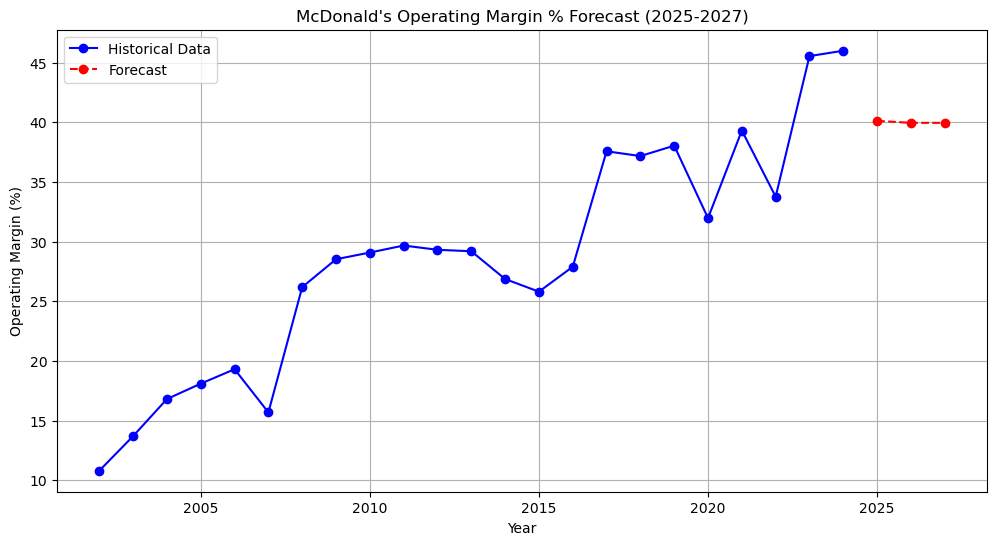

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Chuẩn bị dữ liệu
X = df[['Year', 'Market cap ($B)', 'Revenue ($B)', 'Earnings ($B)']]
y = df['Operating Margin (%)']

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# Dự báo cho các năm 2025-2027
future_years = pd.DataFrame({
    'Year': [2025, 2026, 2027],
    'Market cap ($B)': [df['Market cap ($B)'].iloc[0] * 1.05,  # Giả định tăng trưởng 5% mỗi năm
                        df['Market cap ($B)'].iloc[0] * 1.05**2,
                        df['Market cap ($B)'].iloc[0] * 1.05**3],
    'Revenue ($B)': [df['Revenue ($B)'].iloc[0] * 1.03,  # Giả định tăng trưởng 3% mỗi năm
                     df['Revenue ($B)'].iloc[0] * 1.03**2,
                     df['Revenue ($B)'].iloc[0] * 1.03**3],
    'Earnings ($B)': [df['Earnings ($B)'].iloc[0] * 1.04,  # Giả định tăng trưởng 4% mỗi năm
                      df['Earnings ($B)'].iloc[0] * 1.04**2,
                      df['Earnings ($B)'].iloc[0] * 1.04**3]
})

predictions = model.predict(future_years)

# Hiển thị kết quả dự báo
print("\nDự báo Operating Margin %:")
for year, pred in zip(future_years['Year'], predictions):
    print(f"Năm {year}: {pred:.2f}%")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Operating Margin (%)'], 'bo-', label='Historical Data')
plt.plot(future_years['Year'], predictions, 'ro--', label='Forecast')
plt.title('McDonald\'s Operating Margin % Forecast (2025-2027)')
plt.xlabel('Year')
plt.ylabel('Operating Margin (%)')
plt.legend()
plt.grid(True)
plt.show()